<a href="https://colab.research.google.com/github/AmrMKayid/KayPruning/blob/master/forai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOR.ai: Let's Prune Neural Network!

---

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from kaypruning.data import DataBunch
from kaypruning.models import *
from kaypruning.trainer import Trainer
from kaypruning.utils import *

In [4]:
db = DataBunch('mnist') # Fashion-MNIST: DataBunch('fashion_mnist')

 [     7.24676s,  INFO] DataBunch:
- name = mnist
- train = <CacheDataset shapes: ((784,), ()), types: (tf.float32, tf.int64)>
- test = <CacheDataset shapes: ((784,), ()), types: (tf.float32, tf.int64)>
- batch = 32

 


In [5]:
model = get_model('BaseModel')  # For Keras Model: get_model('KerasModel')

 [    10.73299s,  INFO] BaseModel:
- supports_masking = False
- optimizer = None
- outputs = []
- inputs = []
- built = False
- layer_1 = <kaypruning.models.base.BaseLayer object at 0x135e37110>
- layer_2 = <kaypruning.models.base.BaseLayer object at 0x135694490>
- layer_3 = <kaypruning.models.base.BaseLayer object at 0x1047346d0>
- layer_4 = <kaypruning.models.base.BaseLayer object at 0x135e37d50>
- classifier = <kaypruning.models.base.BaseLayer object at 0x135e37350>

 


In [6]:
trainer = Trainer(model=model, db=db)

 [    12.36234s,  INFO] Trainer:
- model = <kaypruning.models.base.BaseModel object at 0x135e37950>
- db = <kaypruning.data.base.DataBunch object at 0x135a43390>
- epochs = 5
- path = /tmp/kay/models/kaypruning/mnist
- loss_object = <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x135e22ad0>
- optimizer = <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x135e22610>
- train_loss = <tensorflow.python.keras.metrics.Mean object at 0x135e22050>
- train_accuracy = <tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x135e22e10>
- test_loss = <tensorflow.python.keras.metrics.Mean object at 0x135e19ad0>
- test_accuracy = <tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x135b85f10>
- ckpt = <tensorflow.python.training.tracking.util.Checkpoint object at 0x135bb1cd0>
- manager = <tensorflow.python.training.checkpoint_management.CheckpointManager object at 0x135e4f410>
- metrics = {'train': {'losses': [], 'accuracies': []}, '

## Training

In [7]:
trainer.run()

 [    89.54943s,  INFO] Epoch 1: (Train Loss: 0.2034536749124527, Accuracy: 94.02166748046875%, Test Loss: 0.14904215931892395, Test Accuracy: 95.45999908447266%) 
 [    89.71373s,  INFO] Saved checkpoint for epoch 1: /tmp/kay/models/kaypruning/mnist/ckpt-1 
 [   135.59924s,  INFO] Epoch 2: (Train Loss: 0.10196620970964432, Accuracy: 97.0133285522461%, Test Loss: 0.09176518768072128, Test Accuracy: 97.43000030517578%) 
 [   135.74225s,  INFO] Saved checkpoint for epoch 2: /tmp/kay/models/kaypruning/mnist/ckpt-2 
 [   182.03852s,  INFO] Epoch 3: (Train Loss: 0.07111632823944092, Accuracy: 97.9183349609375%, Test Loss: 0.11594527214765549, Test Accuracy: 96.91999816894531%) 
 [   182.21670s,  INFO] Saved checkpoint for epoch 3: /tmp/kay/models/kaypruning/mnist/ckpt-3 
 [   234.56973s,  INFO] Epoch 4: (Train Loss: 0.059780266135931015, Accuracy: 98.33499908447266%, Test Loss: 0.10568337142467499, Test Accuracy: 97.37999725341797%) 
 [   234.75062s,  INFO] Saved checkpoint for epoch 4: /tm

In [8]:
trainer.metrics

{'train': {'losses': [<tf.Tensor: id=5461, shape=(), dtype=float32, numpy=0.20345367>,
   <tf.Tensor: id=9943, shape=(), dtype=float32, numpy=0.10196621>,
   <tf.Tensor: id=14425, shape=(), dtype=float32, numpy=0.07111633>,
   <tf.Tensor: id=18907, shape=(), dtype=float32, numpy=0.059780266>,
   <tf.Tensor: id=23389, shape=(), dtype=float32, numpy=0.051849663>],
  'accuracies': [<tf.Tensor: id=5466, shape=(), dtype=float32, numpy=94.02167>,
   <tf.Tensor: id=9948, shape=(), dtype=float32, numpy=97.01333>,
   <tf.Tensor: id=14430, shape=(), dtype=float32, numpy=97.918335>,
   <tf.Tensor: id=18912, shape=(), dtype=float32, numpy=98.335>,
   <tf.Tensor: id=23394, shape=(), dtype=float32, numpy=98.52667>]},
 'test': {'losses': [<tf.Tensor: id=5469, shape=(), dtype=float32, numpy=0.14904216>,
   <tf.Tensor: id=9951, shape=(), dtype=float32, numpy=0.09176519>,
   <tf.Tensor: id=14433, shape=(), dtype=float32, numpy=0.11594527>,
   <tf.Tensor: id=18915, shape=(), dtype=float32, numpy=0.105683

## Pruning

In [9]:
trainer.run_pruning()

 [   361.84473s,  INFO] Restored from /tmp/kay/models/kaypruning/mnist/ckpt-5 
 [   361.84498s,  INFO] weight pruning: 0.0% 
 [   364.77558s,  INFO] Test Loss: 0.11177998036146164, Test Accuracy: 97.31999969482422 %

 
 [   364.87776s,  INFO] Restored from /tmp/kay/models/kaypruning/mnist/ckpt-5 
 [   364.87838s,  INFO] weight pruning: 25.0% 
 [   367.24439s,  INFO] Test Loss: 0.10894376784563065, Test Accuracy: 97.3699951171875 %

 
 [   367.29621s,  INFO] Restored from /tmp/kay/models/kaypruning/mnist/ckpt-5 
 [   367.29636s,  INFO] weight pruning: 50.0% 
 [   369.78423s,  INFO] Test Loss: 0.0992799773812294, Test Accuracy: 97.45999908447266 %

 
 [   369.83761s,  INFO] Restored from /tmp/kay/models/kaypruning/mnist/ckpt-5 
 [   369.83776s,  INFO] weight pruning: 60.0% 
 [   372.66724s,  INFO] Test Loss: 0.09414451569318771, Test Accuracy: 97.3699951171875 %

 
 [   372.72088s,  INFO] Restored from /tmp/kay/models/kaypruning/mnist/ckpt-5 
 [   372.72124s,  INFO] weight pruning: 70.0%

In [10]:
trainer.print_metrics()

 [   443.96424s,  INFO] (0) Sparsity (k): 0.0% => Weight Loss: 0.11177998036146164, Weight Accuracy: 97.31999969482422% Unit Loss: 0.11177998036146164, Unit Accuracy: 97.31999969482422% 
 [   443.96456s,  INFO] (1) Sparsity (k): 25.0% => Weight Loss: 0.10894376784563065, Weight Accuracy: 97.3699951171875% Unit Loss: 0.10792181640863419, Unit Accuracy: 97.33000183105469% 
 [   443.96473s,  INFO] (2) Sparsity (k): 50.0% => Weight Loss: 0.0992799773812294, Weight Accuracy: 97.45999908447266% Unit Loss: 0.10237825661897659, Unit Accuracy: 97.1500015258789% 
 [   443.96848s,  INFO] (3) Sparsity (k): 60.0% => Weight Loss: 0.09414451569318771, Weight Accuracy: 97.3699951171875% Unit Loss: 0.15729199349880219, Unit Accuracy: 96.55999755859375% 
 [   443.96865s,  INFO] (4) Sparsity (k): 70.0% => Weight Loss: 0.10094326734542847, Weight Accuracy: 97.43000030517578% Unit Loss: 0.45594504475593567, Unit Accuracy: 95.06999969482422% 
 [   443.96875s,  INFO] (5) Sparsity (k): 80.0% => Weight Loss: 0

In [11]:
w_loss, w_acc, u_loss, u_acc = trainer.get_metrics()
# w_loss, w_acc, u_loss, u_acc

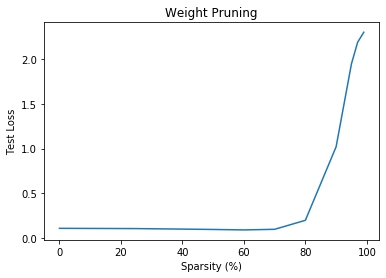

In [12]:
plot(y=w_loss, prune_type='Weight', type='Loss')

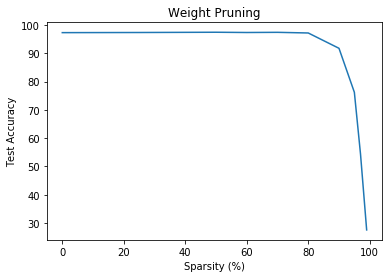

In [13]:
plot(y=w_acc, prune_type='Weight', type='Accuracy')

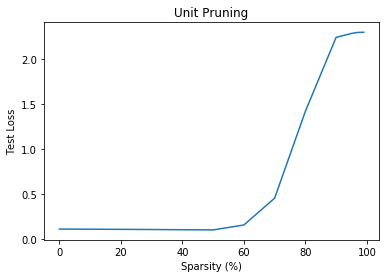

In [14]:
plot(y=u_loss, prune_type='Unit', type='Loss')

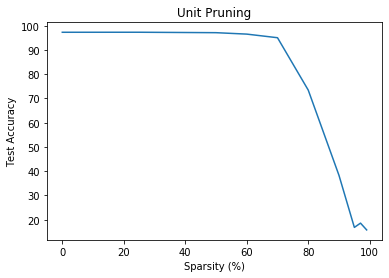

In [15]:
plot(y=u_acc, prune_type='Unit', type='Accuracy')

#### Two Pruning Methods

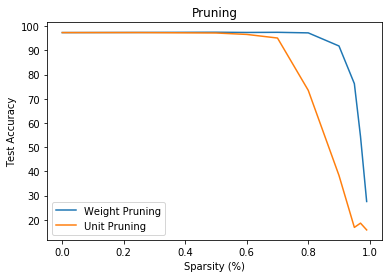

In [16]:
plt.plot(prune_configs.k, w_acc, label = "Weight Pruning") 
plt.plot(prune_configs.k, u_acc, label = "Unit Pruning") 
  
plt.xlabel('Sparsity (%)') 
plt.ylabel('Test Accuracy') 
plt.title('Pruning') 
  

plt.legend() 
plt.show()

In [17]:
pd.DataFrame(data={
    'Percent Sparsity': list(map(lambda k: k * 100, prune_configs.k)),
    'Test Accuracy (Weight Pruning)': w_acc,
    'Test Accuracy (Unit Pruning)': u_acc,    
})

,Percent Sparsity,Test Accuracy (Weight Pruning),Test Accuracy (Unit Pruning)
0,0.0,"tf.Tensor(97.32, shape=(), dtype=float32)","tf.Tensor(97.32, shape=(), dtype=float32)"
1,25.0,"tf.Tensor(97.369995, shape=(), dtype=float32)","tf.Tensor(97.33, shape=(), dtype=float32)"
2,50.0,"tf.Tensor(97.46, shape=(), dtype=float32)","tf.Tensor(97.15, shape=(), dtype=float32)"
3,60.0,"tf.Tensor(97.369995, shape=(), dtype=float32)","tf.Tensor(96.56, shape=(), dtype=float32)"
4,70.0,"tf.Tensor(97.43, shape=(), dtype=float32)","tf.Tensor(95.07, shape=(), dtype=float32)"
5,80.0,"tf.Tensor(97.2, shape=(), dtype=float32)","tf.Tensor(73.46, shape=(), dtype=float32)"
6,90.0,"tf.Tensor(91.78, shape=(), dtype=float32)","tf.Tensor(38.29, shape=(), dtype=float32)"
7,95.0,"tf.Tensor(76.22, shape=(), dtype=float32)","tf.Tensor(16.83, shape=(), dtype=float32)"
8,97.0,"tf.Tensor(54.38, shape=(), dtype=float32)","tf.Tensor(18.59, shape=(), dtype=float32)"
9,99.0,"tf.Tensor(27.529999, shape=(), dtype=float32)","tf.Tensor(15.790001, shape=(), dtype=float32)"


# Analysis

## Summary:

Pruning neural network can throw out many of the neurons of the network without affecting the performance/accuracy so much. This enables neural networks to be faster and smaller. This is very useful when deploying models for mobile application as the models will take less space on the disk.

As we can see from the results, we can observe that the weight pruning is considered to be better than the unit pruning. This might be because in weight pruning we remove the least significant weights that have a small impact on the model. This allows the method to have approximately the same accuracy (~ 0.42 difference) with sparsity (80%). Comparing this to the unit pruning, we can observe that it hurts the accuracy of the model and have a big decline with higher sparsity percent. With (80%) sparsity, the accuracy of the model dropped to 82.78% with a drop of (~ 14.8)!

Why the pruning has similar accuracy even after pruning more than 50% of the network. This might be because of some parameters have redundancy, some duplication in the information represented in the learned model. So eliminating some weights from a very large network that do a simple task of classifying some images from (MNIST or Fashion-MNIST) can have the same performance.


## Questions & Answers (QA)

### What interesting insights did you find? 
> Pruning Neural Networks till 60% have a little impact on the model performance. After that, pruning with higher k values have a huge impact on performance. Comparing the two pruning methods, I found the performance is better when using Weight pruning compared to the Unit pruning. 

> In Unit pruning, starting from (70%), there is a big decrease in the performance. Whereas in Weight Pruning, this happens 95% and 99% sparsity. Both pruning methods perform very badly at 99% sparsity!

### Do the curves differ?
> Both curves are approximately similar till 60% sparsity. 
This is a serious declining for
    * Unit pruning: between 70-99% 
    * Weight pruning: between 95-99%

### Why do you think that is/isn’t? 
> I think unit pruning is a little aggressive and have a higher impact since we eliminate entire columns in the weight matrix which might have good connections and affect the overall performance. 

> This is not the case for weight pruning as we are getting rid of the weights that have the least impact on the model and are not contributing that much for the model. Also, since they are randomly deleted from different layers according to their absolute value this might have less correlation between them.

### Do you have any hypotheses as to why we are able to delete so much of the network without hurting performance (this is an open research question)?
> This is because we have a very large network with so many neurons for a simple task (classifying MNIST || Fashion-MNIST). Hence, pruning with slightly large percentage can still save the same performance or doesn't hurt the performance so much.

## Bonus

According to [Tensorflow sparse training](https://www.tensorflow.org/model_optimization/guide/pruning/train_sparse_models) we can prune the model while the training is proceeding be schudling the pruning process. Also, for matrix multiplication with sparsity, the multiplications between some rows and  columns will be redundant and output will be zero. This can reduces the execution time.

[J. Frankle & M. Carbin: The Lottery Ticket Hypothesis: Finding Sparse, Trainable Neural Networks](https://www.youtube.com/watch?v=s7DqRZVvRiQ): we can train (sparsely) pruned networks from scratch. This can be done be doing weight pruning before training. The process is randomly initializing the full network, train and prune it, then resting the remaining weights to its value from the initialization. 